# Reverse time migration example on a 2D  acoustic model

## Set up environment.

In [1]:
from ipyparallel import Client
c = Client(profile='mpi')
dview = c[:]

with dview.sync_imports():
    import sys
    import numpy
    from examples.acoustic import demo_toolkit
    from examples.acoustic.Acoustic_codegen import Acoustic_cg

# Setup figure size
%matplotlib inline

import matplotlib.pyplot as plt
fig_size = [0, 0]
fig_size[0] = 18
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size

importing sys on engine(s)
importing numpy on engine(s)
importing demo_toolkit from examples.acoustic on engine(s)
importing Acoustic_cg from examples.acoustic.Acoustic_codegen on engine(s)


## Load synthetic velocity model.

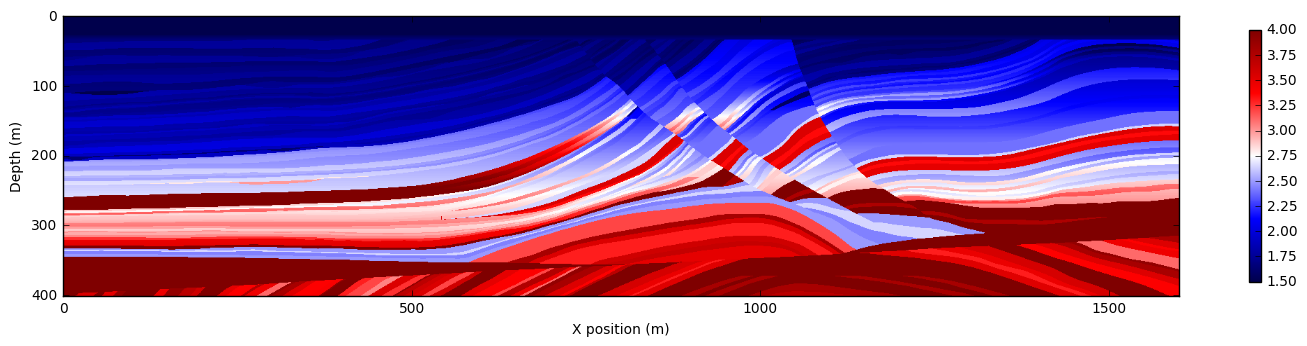

In [2]:
demo = demo_toolkit.marmousi2D()
model = demo.get_true_model()

demo.plot_velocity(model.vp)

## Create "initial guess" by smoothening the synthetic velocity model.

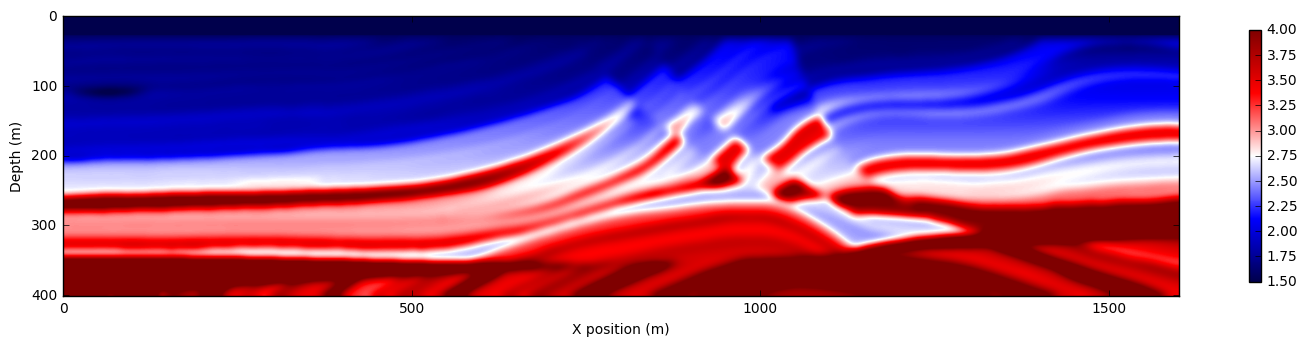

In [3]:
model0 = demo.get_initial_model()
demo.plot_velocity(model0.vp)

## Example of a shot record

In [4]:
# %load_ext snakeviz

GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/5a982c45ab01dae725fb02aec816055dff9a95be.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/857aa2c1632302f8d04b350ac6d76d31cb02a390.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/0dcd75b152e11dae2fda9681fc0c9f6ce923983b.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/067f8425add88338b991ecf6576dba597853297f.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/06e5f2dc19165e7056bfded4ef1e94d83f0e3800.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/0905f80295bcc4685dd4c29f90cf7e437b9b7723.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/8a46bf1c25562944e1cad8b0d4b0ece4050d24f8.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/cc3b4a2e458ba326dd391

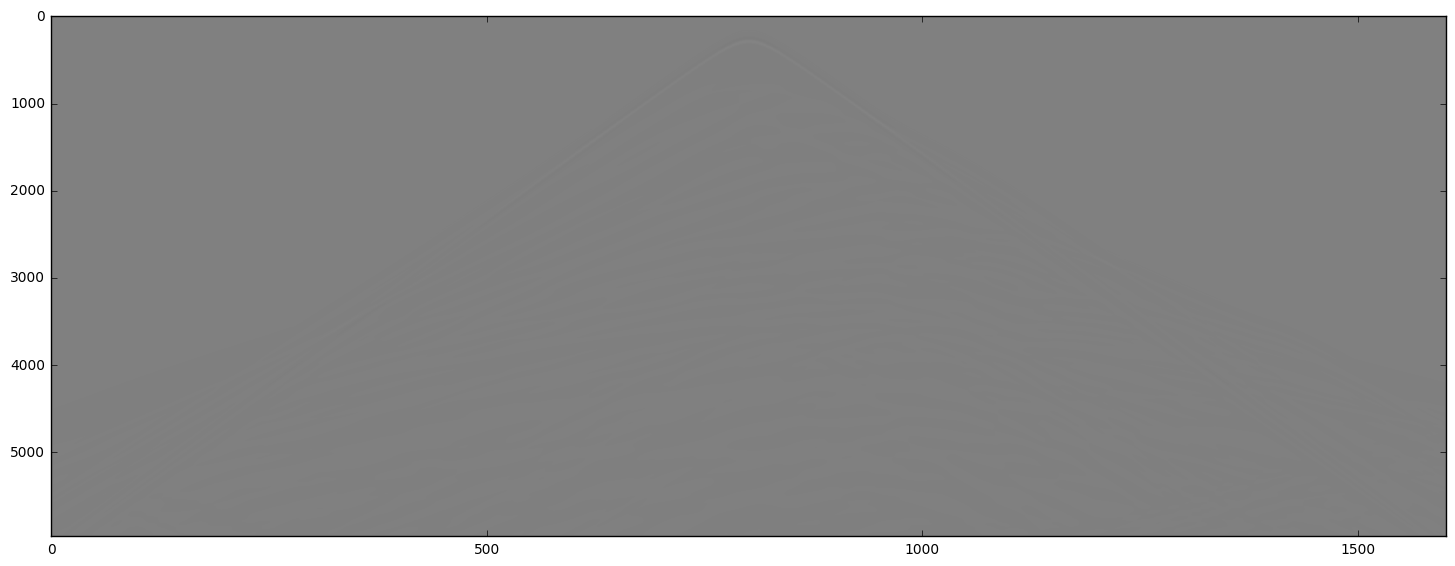

In [5]:
# %%snakeviz
data, rec = demo.get_shot(50)

# Create acoustic modelling kernel.
Acoustic = Acoustic_cg(model0, data, t_order=2, s_order=10)

# Execute acoustic forward model.
rec0, u, gflopss, oi, timings = Acoustic.Forward(save=False, cse=True)

demo.plot_record(rec0)

## RTM loop

In [ ]:
# %%snakeviz
def grad_shot(i):
    demo = demo_toolkit.marmousi2D()

    model0 = demo.get_initial_model()
    data, rec = demo.get_shot(i)

    Acoustic0 = Acoustic_cg(model0, data, t_order=2, s_order=4)
    rec0, u0, gflopss, oi, timings = Acoustic0.Forward(save=True, cse=True)

    # Return gradient
    return Acoustic0.Gradient(rec0 - rec, u0, cache_blocking=None)

# grads = dview.map(grad_shot, range(8))
grads = map(grad_shot, range(8))

grad = sum(grads)

GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/051d8597207a8e0b16e397203454073d0f536ad5.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/33205a44ca7e6c983bd4c23c7cdb7b5a2cb23545.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/dbf6125a25e977a55d3a28dcd1478317f0b7975c.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/a174c5d0ab23fce8670b05893335724382c74d94.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/2b4a021be4b872688078b169d15f15509173128f.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/2d395f0f1906773ad0a18491d9d76b7f106a3071.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/04f7f8a41ff59159ca7424bd80c71fdc261ee330.cpp
GNUCompiler: Compiling /var/folders/qr/4hc1nw7d3hj55jbd1z7kkrvh0000gn/T/devito-501/500a6d529690be191b8d8

In [2]:
demo.plot_rtm(grad)
# print(grad)

NameError: name 'grad' is not defined